In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def do_fft(sig,dt):
    
    # sig: signal we want to fft
    # dt: 1/sampling rate, or time step
    
    cplx = np.fft.rfft(sig) # complex
    amp = np.abs(cplx) #amplitude
    
    # normalize the amp by the length of the signal
    amp = (amp / len(sig)) * 2
    
    freq_x = np.fft.rfftfreq(len(sig),dt)
    
    return amp, cplx, freq_x

# amp, cplx, freq_x = do_fft(sig = my_sig, dt = my_dt)
# is same as:
# amp, cplx, freq_x = do_fft(dt = my_dt,sig = my_sig)

In [3]:
# set up a signal
Lf = 1
Hf = 16 
freqs = np.linspace(Lf,Hf,(Hf-Lf)+1)
print(freqs)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]


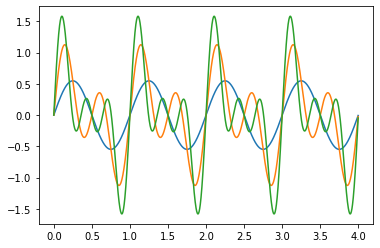

In [4]:
np.random.seed(0)
sr =512 # sampling rate
tmax = 4
dt = 1/sr
t = np.arange(0,tmax,dt)

sig = np.zeros(len(t))
for f in freqs:
    sig += np.random.rand() * np.sin(2*np.pi*f*t)
    if f < 4:
        plt.plot(t,sig)
plt.show()

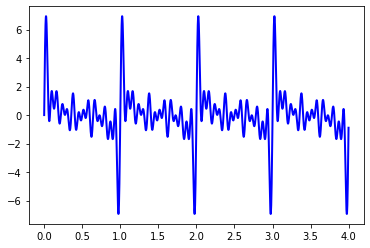

In [5]:
plt.plot(t,sig, 'b-', linewidth=2)
plt.show()

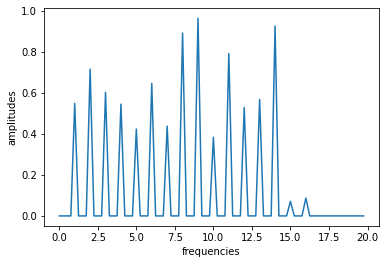

In [7]:
amp, cplx, freq_x = do_fft(sig = sig, dt = dt)
plt.plot(freq_x[0:80],amp[0:80])
plt.xlabel('frequencies')
plt.ylabel('amplitudes')
plt.show()

In [8]:
freq_x.shape, amp.shape

((1025,), (1025,))

In [9]:
# low pass filter
lp = 5
# find the entry that corresponds to our lp cutoff
cutoff_pnt = np.argmin(np.abs(freq_x - lp)) # index of the min
print(cutoff_pnt)
print(freq_x[cutoff_pnt])

20
5.0


### Brick wall filter - "ideal" low pass filter

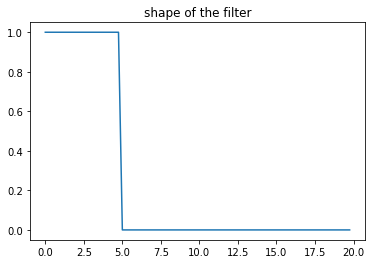

In [10]:
lp_filt = np.zeros(len(freq_x))
lp_filt[0:cutoff_pnt] = 1
plt.plot(freq_x[0:80], lp_filt[0:80])
plt.title('shape of the filter')
plt.show()

### Apply the low pass filter to the signal

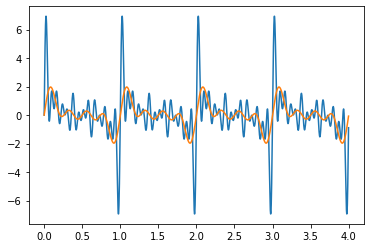

In [11]:
filt_sig = cplx * lp_filt
filt_sig = np.fft.irfft(filt_sig)
plt.plot(t,sig)
plt.plot(t,filt_sig)

## write external function files

In [12]:
# %%: Cell Magic Functions

In [13]:
%%writefile my_brick_filt.py 
import numpy as np

# function
def define_filt(fx, filt_freq, type_filt):
    
    """
    This is a doc string - implement lp or hp filter
    
    Input Args:
        fx (array, float): list of frequencies, takend from np.fft.rfftfreq
        filt_freq (int): cutoff freq for lp or hp filter
        type_filt (str): lp = low pass, hp = high pass
        
    Returns:
        brick: brick wall filter ... 
    """
    
    cutoff_pnt = np.argmin(np.abs(fx - filt_freq))
    brick = np.zeros(len(fx))
    
    if type_filt == 'lp':
        brick[0:cutoff_pnt] = 1
    elif type_filt == 'hp':
        brick[cutoff_pnt:] = 1
    else:
        print('wrong filter')
        return 0
    
    return brick
        
    
def apply_filt(sig,filt):
    
    """
    docstring - apply the defined filter to the ffted signal
    
    """
    
    fft_sig = np.fft.rfft(sig)
    inverse_sig = np.fft.irfft(fft_sig * filt)
    return inverse_sig

Overwriting my_brick_filt.py


In [14]:
import my_brick_filt as mbf

In [15]:
mbf.define_filt?

### High pass filter

In [16]:
hp = 12
hp_filt = mbf.define_filt(freq_x, hp, 'hp')

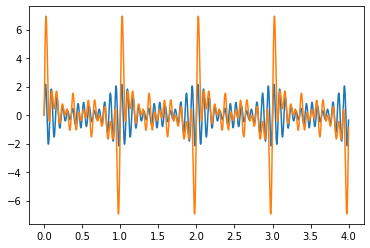

In [17]:
filt_sig = mbf.apply_filt(sig, hp_filt)
plt.plot(t,filt_sig)
plt.plot(t,sig)
plt.show()